<a href="https://colab.research.google.com/github/IhsanRidhoAsmoro/MachineLearningTask/blob/main/tugas8/SVM_diabetesdataser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes-dataset.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi fitur (X) dan label (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM
svm_model = SVC(kernel='linear')  # Menggunakan kernel linear untuk kasus klasifikasi

# Melatih model pada data pelatihan
svm_model.fit(X_train, y_train)

# Memprediksi label pada data pengujian
y_pred = svm_model.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       253
           1       0.79      0.59      0.67       147

    accuracy                           0.79       400
   macro avg       0.79      0.75      0.76       400
weighted avg       0.79      0.79      0.78       400



In [10]:
pip install mlxtend


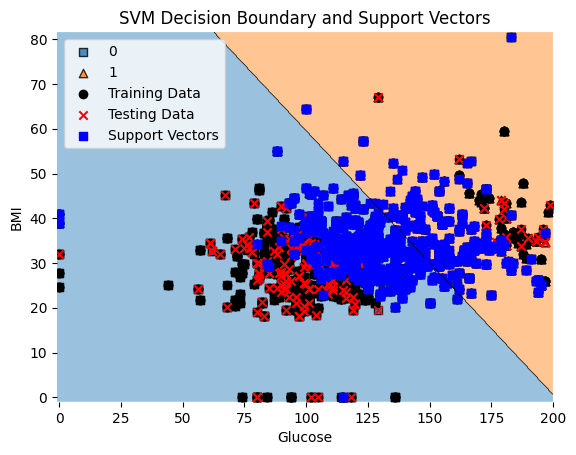

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Hanya menggunakan dua fitur untuk plot 2D (contoh: Glucose dan BMI)
X_plot = X[['Glucose', 'BMI']].values
X_train_plot = X_train[['Glucose', 'BMI']].values
X_test_plot = X_test[['Glucose', 'BMI']].values

# Membuat dan melatih model SVM untuk plot
svm_model_plot = SVC(kernel='linear')
svm_model_plot.fit(X_train_plot, y_train)

# Plot decision boundary dan vektor pendukung
plot_decision_regions(X_plot, y.values, clf=svm_model_plot, legend=2)
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('Glucose')
plt.ylabel('BMI')

# Menyoroti data pelatihan dan pengujian
plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c='black', marker='o', label='Training Data')
plt.scatter(X_test_plot[:, 0], X_test_plot[:, 1], c='red', marker='x', label='Testing Data')

# Menandai vektor pendukung
sv = svm_model_plot.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], c='blue', marker='s', label='Support Vectors')

plt.legend()
plt.show()


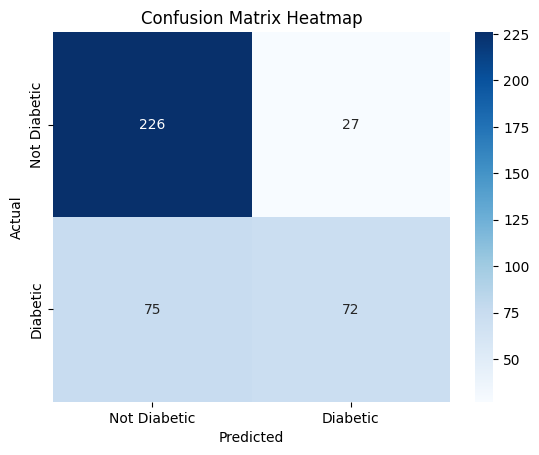

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Memilih dua atribut untuk heatmap (contoh: 'Glucose' dan 'BMI')
heatmap_features = ['Glucose', 'BMI']

# Mengambil subset dari data untuk plot
heatmap_data = df[heatmap_features + ['Outcome']]

# Membagi data menjadi fitur (X) dan label (y)
X_heatmap = heatmap_data[heatmap_features].values
y_heatmap = heatmap_data['Outcome'].values

# Membagi data menjadi data pelatihan dan data pengujian
X_train_heatmap, X_test_heatmap, y_train_heatmap, y_test_heatmap = train_test_split(
    X_heatmap, y_heatmap, test_size=0.2, random_state=42
)

# Membuat dan melatih model SVM untuk heatmap
svm_model_heatmap = SVC(kernel='linear')
svm_model_heatmap.fit(X_train_heatmap, y_train_heatmap)

# Memprediksi label pada data pengujian
y_pred_heatmap = svm_model_heatmap.predict(X_test_heatmap)

# Menghitung confusion matrix
cm = confusion_matrix(y_test_heatmap, y_pred_heatmap)

# Membuat heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Diabetic', 'Diabetic'], yticklabels=['Not Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
